# 各モジュールの紹介
matplotlib, numpyについては以前の資料を参考にしてください


spectral_cube : https://spectral-cube.readthedocs.io/en/latest/index.html
　
 - 0, 1, 2次モーメントを計算したり, fitsを切り出したりしてくれるモジュール　すごく便利で, 公式のdocsも読みやすい
 
astropy : https://www.astropy.org/
　
 - なんでもできます。天文データの解析にも使えるが, 機能が多い分わかりにくい。spectral_cubeでできない部分を補うイメージ
 - 開発でpythonを使う人は必須
 
aplpy : https://aplpy.readthedocs.io/en/stable/index.html
　
 - 可視化ライブラリー。内部で動いているのはmatplotlibなので, plt.rcParamsなどで設定した設定はそのまま使える
 - 動作は遅いが論文に使えるクオリティーの図を簡単に作成できる
 - idlに似た操作感だと個人的には思います。

In [1]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube as sc
import aplpy
import astropy.units as u
from jupyter_io import savefig_in_notebook

# fitsの読み込み&データアクセス

pythonでは, headerとdataは同時に読み込みます
astropyを使って読み込んだfitsはheader-data unitというobjectになります



In [2]:
hdu = fits.open('/home/amigos/r_yamada/ymdfits/W3_analy_shell.fits')[0]

In [3]:
#データにアクセス
data = hdu.data
## numpy.ndarray objectでデータを返す

#headerにアクセス
header = hdu.header
## astropy.io.fits.header.Headerでheaderを返す

# 解析開始

簡単な解析

-　numpyを使って頑張る

積分強度図, モーメントマップ, PV図など

　- spectral cube, fits_toolsでできる
 
数値的な解析

 - numpy, scipyを使って解析

In [4]:
cube = sc.read(hdu)

In [5]:
#速度範囲の切り出し
subcube = cube.spectral_slab(-55*u.km/u.s, -40*u.km/u.s)
subcube = subcube.with_spectral_unit(u.km/u.s)

In [6]:
mom0 = subcube.moment(order=0)
mom1 = subcube.moment(order=1)
mom2 = subcube.moment(order=2)

# spectral_cubeの使い方

 - moment methodで０次, 1次, 2次モーメントを作成 二次モーメントのデフォルトは分散！
 - numpyと同じスライスで範囲の切り出し, headerを自動で編集してくれる
 - hdu methodでheader-data unitに変換

In [7]:
# hduにする
hdu_mom0 = mom0.hdu

# 可視化！！

 - 可視化する上で一番わかりやすいのはaplpy

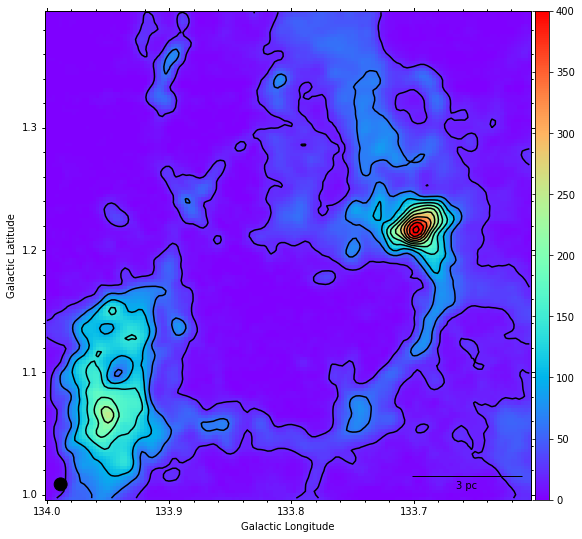

In [10]:
f = aplpy.FITSFigure(hdu_mom0)
f.show_colorscale(vmax=400, vmin=0, cmap='rainbow')
# 軸の表記を変換
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')

# カラーバー
f.add_colorbar()

#contour
f.show_contour(levels=np.linspace(0,20,21)*40+20, colors='black')

#スケールバー
f.add_scalebar(0.08999993250009113, '3 pc', color = 'black')

#ビームサイズ
f.add_beam()
f.beam.set_color('black')
#savefig_in_notebook(f, 'test.pdf')

In [11]:
savefig_in_notebook(f, 'test.pdf')

INFO: Auto-setting resolution to 21.1921 dpi [aplpy.core]


# 問題

1. 天体までの距離が2 kpc, スケールバーの長さを5 pc とした時, スケールバーの長さは何arcminになりますか？

2. 天体までの距離とスケールバーの長さをpc単位で指定すると, 天空上でのスケールバーの長さをarcmin単位で計算してくれる関数を作りましょう

# 問題

1. 上の図で色々なカラーマップを試して気に入ったものを見つける
2. スケールをログスケールに変えてみる

# 練習問題

1. 1次モーメントマップを描画してみよう
2. 2次モーメントマップを描画してみよう
3. spectral_cubeを使わずに, numpyだけで全積分強度図を作ってみよう
